## Preperation:

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
SAMPLE_COUNT = 55

In [0]:
a = 5 * np.random.rand()
b = 10 * np.random.rand()
X = 10 * np.random.rand(SAMPLE_COUNT)
np.ndarray.sort(X)
y = a * (X + 2 * (-.5 + np.random.rand(X.shape[0]))) + b 

In [0]:
points = list(zip(X, y))
points[:3]

[(0.0231331327498685, 12.565160012695149),
 (0.02433039587478536, 9.048966286398922),
 (0.3679185928019135, 14.333781781358837)]

### These are the randomly sampled points and the 'real' line:

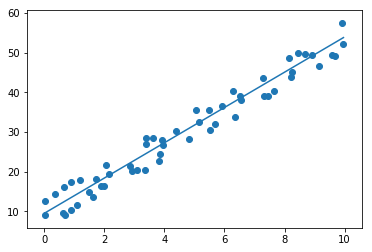

In [0]:
plt.plot(X, a * X + b)
plt.scatter(*list(zip(*points)))

Define ***a*** & ***b*** to 1

In [0]:
a, b = 1, 1

Q1.a
Normalize (MinMax) the values of X & y.
This mean the minimum will be zero and the maximum will be 1.


In [0]:
#saving coorect min and max for posible future role
xmin,xmax=min(X), max(X) 
ymin,ymax=min(y), max(y)

#normalizing X
x_nor= (X-xmin)/(xmax-xmin)


#normalizing y
y_nor= (y-ymin)/(ymax-ymin)




Q1.b Compute the average from the sum of the derivatives of the error of all points.

In [0]:
def error (a,b,X,y):
  return .5 * (y - (a * X + b)) ** 2

# calculatin 'a' derivative error in dicrit point 
def a_error (a,b,X,y):
  return (y-(a*X+b))*(-X)

# calculatin 'b' derivative error in dicrit point             
def b_error (a,b,X,y):
  return (y-a*X-b)*(-1)

#updating a and b by the derivative mean
def updaitig_weigth (a,b,x_nor,y_nor,learning_rate):
  new_a = a - learning_rate * mean([a_error(a,b,x,y) for x,y in zip(x_nor,y_nor) ])
  new_b = b - learning_rate * mean([b_error(a,b,x,y) for x,y in zip(x_nor,y_nor) ])
  cor_error = mean([error(a,b,x,y) for x,y in zip(x_nor,y_nor) ])
  return float(new_a),float(new_b),float(cor_error)


# function for averaging list
def mean(a):
  return sum(a)/float(len(a))

## trying to understand error in the while loop
d,f,g=updaitig_weigth (a,b,x_nor,y_nor,0.002) 
print(d,f,g)
print(type(d),type(f),type(g))

0.9990231278059567 0.9979282621040186 0.5384544946302536
<class 'float'> <class 'float'> <class 'float'>


Q1.c Create a variable with a small value and assign it to the name ***learning_rate***, you may need to slowly deminish that value.

In [0]:
learning_rate=1e-3

Q1.d Write an outer loop that deducts the resulting mean of derivative from a & b respectively each iteration.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


1 loop, best of 3: 241 ms per loop


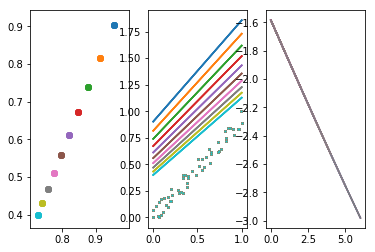

In [0]:
%%timeit

a, b = 1, 1
curent_error=float(mean(error(a,b,x_nor,y_nor)))
iteration=0
iteration_max=1000
#saving a's values

all_as=[a]
#saving b's values
all_bs=[b]
#saving errors :
errors=[curent_error] 
while (curent_error>1e-3 and iteration<iteration_max) :
  a,b,curent_error=updaitig_weigth(a,b,x_nor,y_nor,learning_rate)
  #all_as.append(a)
  #all_bs.append(b)
  iteration+=1
  
  
  if iteration%100==0:
    
    plt.subplot(1, 3, 1)
    plt.scatter(a, b)
    plt.subplot(1, 3, 2)
    plt.plot(x_nor, a * x_nor + b)
    plt.scatter(x_nor, y_nor, s=1)
    ## saving every 1000 iteration error and ploting it
    errors.append(curent_error)
    plt.subplot(1, 3, 3)
    plt.plot(*zip(*enumerate(np.log(errors[4:]))))

  

Plotting the line and the weight values:

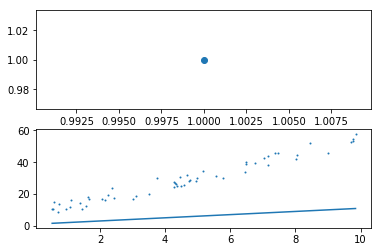

In [0]:
"""#for ploting
X=xnor
y=ynor

plt.subplot(2, 1, 1)
plt.scatter(a, b)
plt.subplot(2, 1, 2)
plt.plot(X, a * X + b)
plt.scatter(X, y, s=1)
'''

Q1.e As you iterate and modify the weights, draw the graph using the code example.

Q1.f Inverse the normalization process.

[ 7.10232292  3.56583287 10.73577005  4.66049145  8.48903728 11.88299219
  6.59098012  8.91504423 13.1369078  14.74407096 11.88629892  9.39698628
  9.0493514  13.92054714 10.53720821 13.67163981 14.5079316  14.95973511
 14.94448865 14.88211795 14.74651207 18.40791195 21.70058627 15.27278767
 21.29351164 21.15022455 19.49867853 18.98335169 22.64355095 19.79118608
 19.7113168  22.51538511 23.76709851 26.56164323 20.95782431 24.34307015
 27.86534808 25.36850429 24.01008617 26.62134494 29.89402467 26.05717607
 30.77760182 27.57999913 33.16575326 29.33346972 36.55909603 31.68060926
 34.63142098 33.359621   37.60691856 35.01130643 36.2629084  37.16428441
 40.43996337]


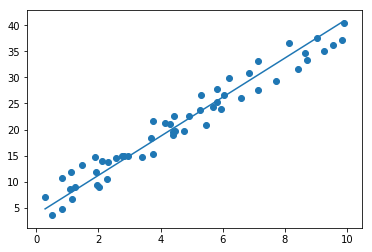

In [0]:
X2=(xmax-xmin)*x_nor+xmin

y2=(ymax-ymin)*y_nor+ymin
points = list(zip(X2, y2))
points[:3]
a_norm=a*((ymax-ymin)+ymin)/(xmax-xmin)
b_norm= mean(y2-a_norm*X2)
plt.plot(X2, a_norm * X2 + b_norm)
plt.scatter(*list(zip(*points)))




Exercise  29

In [0]:
# 4799 2739 8713 6272
creditcard_for_validation=input("please enter credit card number you want to validate\n").replace(' ','')[::-1]
total_sum = 0
e=[]
for i, c in enumerate(creditcard_for_validation):
  e .append( int(c) * (2 if i % 2 else 1))
if sum(e)%10:
  print('the cerdit card you entered is valid')
else:
  print('the cerdit card you entered is not valid')
  
  


please enter credit card number you want to validate
4799 2739 8713 6272
the cerdit card you entered is valid
